# Predict Credit Card Fraud

Credit card fraud is one of the leading causes of identify theft around the world. In 2018 alone, over [$24 billion](https://shiftprocessing.com/credit-card-fraud-statistics/) were stolen through fraudulent credit card transactions. Financial institutions employ a wide variety of different techniques to prevent fraud, one of the most common being Logistic Regression.

In this project, you are a Data Scientist working for a credit card company. You have access to a dataset (based on a [synthetic financial dataset](https://www.kaggle.com/datasets/ealaxi/paysim1)), that represents a typical set of credit card transactions. transactions.csv is the original dataset containing 200k transactions. For starters, we’re going to be working with a small portion of this dataset, transactions_modified.csv, which contains one thousand transactions. Your task is to use Logistic Regression and create a predictive model to determine if a transaction is fraudulent or not.

In [60]:
import seaborn as sns   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##  1.

- The file `transactions_modified.csv` contains data on 1000 simulated credit card `transactions`. 
- Let’s begin by loading the data into a pandas DataFrame named transactions. 
- Take a peek at the dataset using `.head()` and you can use `.info()` to examine how many rows are there and what datatypes the are.
- How many transactions are fraudulent? 
- Print your answer.

In [61]:
transactions = pd.read_csv('transactions_modified.csv')
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


In [62]:
transactions.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrg   1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
 10  isPayment       1000 non-null   int64  
 11  isMovement      1000 non-null   int64  
 12  accountDiff     1000 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 101.7+ KB


In [63]:
transactions.groupby('isFraud').size()

isFraud
0    718
1    282
dtype: int64

In [64]:
transactions.isFraud.value_counts()

isFraud
0    718
1    282
Name: count, dtype: int64

In [65]:
transactions.isFraud.sum()

np.int64(282)

##  2.

- Looking at the dataset, combined with our knowledge of credit card transactions in general, we can see that there are a few interesting columns to look at. 
- We know that the `amount` of a given transaction is going to be important. 
- Calculate summary statistics for this column. 
- What does the distribution look like?

In [66]:
transactions.amount.describe()

count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64

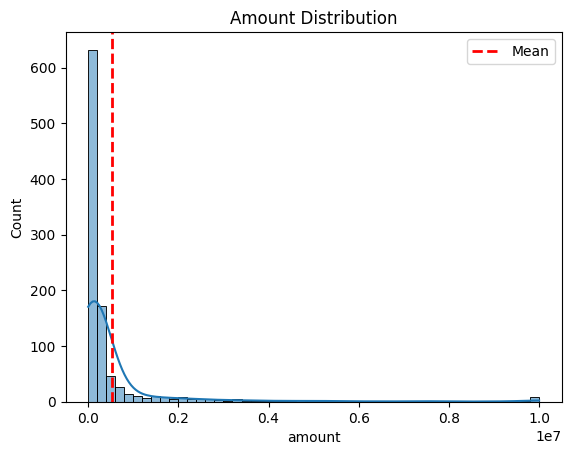

In [67]:
sns.histplot(transactions.amount, kde=True, bins=50)
plt.axvline(transactions.amount.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Amount Distribution')
plt.legend()
plt.show()

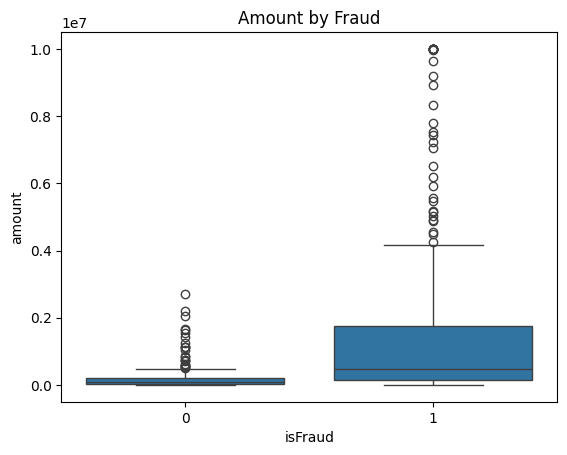

In [68]:
sns.boxplot(x='isFraud', y='amount', data=transactions)
plt.title('Amount by Fraud')
plt.show()

##  3.

- We have a lot of information about the `type` of transaction we are looking at. 
- Let’s create a new column called `isPayment` that assigns a `1` when `type` is “PAYMENT” or “DEBIT”, and a `0` otherwise.

In [ ]:
# transactions['isPayment'] = 0
# transactions['isPayment'][transactions['type'].isin(['PAYMENT','DEBIT'])] = 1

transactions["isPayment"] = transactions.type.apply(lambda x: 1 if x == 'PAYMENT' or x == "DEBIT" else 0)
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


##  4.

- Similarly, create a column called `isMovement`, which will capture if money moved out of the origin account. 
- This column will have a value of `1` when `type` is either “CASH_OUT” or “TRANSFER”, and a `0` otherwise.

In [ ]:
# transactions['isMovement'] = 0
# transactions['isMovement'][transactions['type'].isin(['CASH_OUT', 'TRANSFER'])] = 1

transactions["isMovement"] = transactions.type.apply(lambda x: 1 if x == 'TRANSFER' or x == "CASH_OUT" else 0)
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


##  5.

- With financial fraud, another key factor to investigate would be the difference in value between the origin and destination account. 
- Our theory, in this case, being that destination accounts with a significantly different value could be suspect of fraud. 
- Let’s create a column called `accountDiff` with the absolute difference of the `oldbalanceOrg` and `oldbalanceDest` columns.

In [71]:
transactions["accountDiff"] = np.abs(transactions.oldbalanceOrg - transactions.oldbalanceDest)
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isPayment,isMovement,accountDiff
0,206,CASH_OUT,62927.08,C473782114,0.00,0.00,C2096898696,649420.67,712347.75,0,0,1,649420.67
1,380,PAYMENT,32851.57,C1915112886,0.00,0.00,M916879292,0.00,0.00,0,1,0,0.00
2,570,CASH_OUT,1131750.38,C1396198422,1131750.38,0.00,C1612235515,313070.53,1444820.92,1,0,1,818679.85
3,184,CASH_OUT,60519.74,C982551468,60519.74,0.00,C1378644910,54295.32,182654.50,1,0,1,6224.42
4,162,CASH_IN,46716.01,C1759889425,7668050.60,7714766.61,C2059152908,2125468.75,2078752.75,0,0,0,5542581.85


##  6.

- Before we can start training our model, we need to define our features and label columns. 
- Our label column in this dataset is the `isFraud` field. 
- Create a variable called `features` which will be an array consisting of the following fields:
    - `amount`
    - `isPayment`
    - `isMovement`
    - `accountDiff`
- Also create a variable called `label` with the column `isFraud`.

In [72]:
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
label = transactions.isFraud

##  7.

- Split the data into training and test sets using `sklearn`‘s `train_test_split()` method. 
- We’ll use the training set to train the model and the test set to evaluate the model. 
- Use a `test_size` value of `0.3`.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 4), (300, 4), (700,), (300,))

##  8.

- Since `sklearn`‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. 
- Create a `StandardScaler` object, `.fit_transform()` it on the training features, and `.transform()` the test features.

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  9.

- Create a `LogisticRegression` model with `sklearn` and `.fit()` it on the training data.
- Fitting the model find the best coefficients for our selected features so it can more accurately predict our label. 
- We will start with the default threshold of 0.5.

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##  10.

- Run the model’s `.score()` method on the training data and print the training score.
- Scoring the model on the training data will process the training data through the trained model and will predict which transactions are fraudulent. 
- The score returned is the percentage of correct classifications, or the accuracy.

In [77]:
model.score(X_train, y_train)

0.8385714285714285

##  11.

- Run the model’s `.score()` method on the test data and print the test score.
- Scoring the model on the test data will process the test data through the trained model and will predict which transactions are fraudulent. 
- The score returned is the percentage of correct classifications, or the accuracy, and will be an indicator for the sucess of your model.
- How did your model perform?

In [78]:
model.score(X_test, y_test)

0.85

##  12.

- Print the coefficients for our model to see how important each feature column was for prediction. 
- Which feature was most important? Least important?

In [ ]:
# features: amount, isPayment, isMovement, accountDiff -> amount is the most important feature, then isMovement, then accountDiff, and finally isPayment
model.coef_ 

array([[ 2.42110403, -0.61050379,  2.10147921, -0.987915  ]])

##  13.

- Let’s use our model to process more transactions that have gone through our systems. 
- There are three numpy arrays pre-loaded in the workspace with information on new sample transactions under “New transaction data”
    ```py
    # New transaction data
    transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
    transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
    transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])
    ```
- Create a fourth array, `your_transaction`, and add any transaction information you’d like. 
- Make sure to enter all values as floats with a `.`!

In [80]:
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])
your_transactions = np.array([18723.23, 0.0, 1.0, 100.0])

##  14.

- Combine the new `transactions` and `your_transaction` into a single numpy array called `sample_transactions`.

In [82]:
sample_transactions = np.stack([transaction1, transaction2, transaction3, your_transactions])
sample_transactions

array([[1.2345678e+05, 0.0000000e+00, 1.0000000e+00, 5.4670100e+04],
       [9.8765430e+04, 1.0000000e+00, 0.0000000e+00, 8.5247500e+03],
       [5.4367831e+05, 1.0000000e+00, 0.0000000e+00, 5.1002550e+05],
       [1.8723230e+04, 0.0000000e+00, 1.0000000e+00, 1.0000000e+02]])

##  15.

- Since our Logistic Regression model was trained on scaled feature data, we must also scale the feature data we are making predictions on. 
- Using the `StandardScaler` object created earlier, apply its `.transform()` method to `sample_transactions` and save the result to `sample_transactions`.

In [83]:
sample_transactions = scaler.transform(sample_transactions)
sample_transactions

c:\Users\larsk\.virtualenvs\Codecademy-XphA9WxU\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.27885917, -0.53550416,  0.81892881, -0.46978056],
       [-0.29594918,  1.86739912, -1.22110737, -0.48268021],
       [ 0.01199527,  1.86739912, -1.22110737, -0.34248879],
       [-0.35135003, -0.53550416,  0.81892881, -0.48503529]])

##  16.

- Which transactions are fraudulent? Use your model’s `.predict()` method on `sample_transactions` and print the result to find out.
- Want to see the probabilities that led to these predictions? Call your model’s `.predict_proba()` method on `sample_transactions` and print the result. 
- The 1st column is the probability of a transaction not being fraudulent, and the 2nd column is the probability of a transaction being fraudulent (which was calculated by our model to make the final classification decision).

In [84]:
model.predict(sample_transactions)

array([0, 0, 0, 0])

In [85]:
model.predict_proba(sample_transactions)

array([[0.61352284, 0.38647716],
       [0.99806334, 0.00193666],
       [0.99645189, 0.00354811],
       [0.65080561, 0.34919439]])

##  17.

- Note that we’d used a modified version of the dataset. 
- You can now try to re-run the project using the original dataset, **transactions.csv**. 
- Examine how the results change. 
- If you notice something weird, you’re totally on to something! That “something” is what is known as an imbalanced class classification problem.